In [2]:
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
#importing the warnings
import warnings
warnings.filterwarnings("ignore")

In [22]:
Train_data=pd.read_csv('train.csv', encoding = "ISO-8859-1") 
Test_data=pd.read_csv('test.csv',encoding = "ISO-8859-1")

In [23]:
Test_data.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon ? 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am ? 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am ? 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am ? 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am ? 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes


In [24]:
Train_data.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am ? 4pm, 7:30pm ? 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm ? 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am ? 3:30pm, 7pm ? 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am ? 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am ? 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [25]:
#Checking the columns
print('Train_data:',Train_data.shape)
print('/n')
print('Test_data:',Test_data.shape)

Train_data: (12690, 9)
/n
Test_data: (4231, 8)


# TRAIN DATA

In [26]:
Train_data.columns

Index(['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY',
       'RATING', 'VOTES', 'COST'],
      dtype='object')

In [27]:
Train_data.dtypes

TITLE            object
RESTAURANT_ID     int64
CUISINES         object
TIME             object
CITY             object
LOCALITY         object
RATING           object
VOTES            object
COST              int64
dtype: object

In [28]:
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          12690 non-null  object
 1   RESTAURANT_ID  12690 non-null  int64 
 2   CUISINES       12690 non-null  object
 3   TIME           12690 non-null  object
 4   CITY           12578 non-null  object
 5   LOCALITY       12592 non-null  object
 6   RATING         12688 non-null  object
 7   VOTES          11486 non-null  object
 8   COST           12690 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 892.4+ KB


In [29]:
Train_data.isnull().values.any()

True

In [30]:
#Checking for null values
Train_data.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1204
COST                0
dtype: int64

In [31]:
Train_data.dropna(inplace=True)

In [32]:
Train_data.isnull().values.any()

False

# SUMMARY STATISTICS

In [33]:
Train_data.describe()

,RESTAURANT_ID,COST
count,11393.000000,11393.000000
mean,7791.278329,682.670148
std,4508.401395,646.942238
min,0.000000,50.000000
25%,3883.000000,300.000000
50%,7807.000000,500.000000
75%,11730.000000,800.000000
max,15573.000000,14000.000000


# EXPLORATORY DATA ANALYSIS

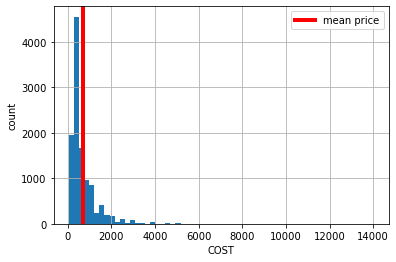

In [35]:
#Cheecking the mean price


price=Train_data['COST'].hist(bins=60)
mean_val=np.mean(Train_data['COST'])
plt.axvline(mean_val,linewidth=4, color='red',label='mean price')
plt.xlabel('COST')
plt.ylabel('count')
plt.legend()
plt.show()

In [36]:
Train_data['TITLE'].unique()

array(['CASUAL DINING', 'CASUAL DINING,BAR', 'QUICK BITES',
       'DESSERT PARLOR', 'CAF\x90', 'MICROBREWERY',
       'QUICK BITES,BEVERAGE SHOP', 'CASUAL DINING,IRANI CAFE',
       'BAKERY,QUICK BITES', 'None', 'BAR,CASUAL DINING', 'BAR', 'PUB',
       'BEVERAGE SHOP', 'FINE DINING', 'CAF\x90,QUICK BITES',
       'BEVERAGE SHOP,DESSERT PARLOR', 'SWEET SHOP,QUICK BITES',
       'DESSERT PARLOR,SWEET SHOP', 'BAKERY', 'BAKERY,DESSERT PARLOR',
       'BAR,LOUNGE', 'FOOD COURT', 'LOUNGE',
       'DESSERT PARLOR,BEVERAGE SHOP', 'LOUNGE,CASUAL DINING',
       'QUICK BITES,FOOD COURT', 'SWEET SHOP', 'PUB,CASUAL DINING',
       'MESS', 'MICROBREWERY,CASUAL DINING', 'CASUAL DINING,SWEET SHOP',
       'KIOSK', 'QUICK BITES,KIOSK', 'CLUB', 'FINE DINING,BAR',
       'DESSERT PARLOR,QUICK BITES', 'FOOD COURT,QUICK BITES',
       'LOUNGE,CAF\x90', 'BAKERY,CONFECTIONERY', 'DHABA',
       'CAF\x90,DESSERT PARLOR', 'CASUAL DINING,CAF\x90',
       'QUICK BITES,DESSERT PARLOR', 'PUB,MICROBREWERY', 'LOUN

In [37]:
Train_data['CUISINES'].unique()

array(['Malwani, Goan, North Indian', 'Asian, Modern Indian, Japanese',
       'North Indian, Chinese, Biryani, Hyderabadi', ...,
       'North Indian, Burger, Kebab', 'Goan, Continental',
       'Finger Food, Continental, Asian, Chinese'], dtype=object)

In [38]:
Train_data['TIME'].unique()

array(['11am ? 4pm, 7:30pm ? 11:30pm (Mon-Sun)', '6pm ? 11pm (Mon-Sun)',
       '11am ? 3:30pm, 7pm ? 11pm (Mon-Sun)', ...,
       '12:1pm ? 4am (Mon-Sun)', '12:30pm ? 9:45pm (Mon-Sun)',
       '12noon ? 1am (Mon-Fri),11am ? 5pm, 7pm ? 1am...'], dtype=object)

In [39]:
Train_data['CITY'].unique()

array(['Thane', 'Chennai', 'Mumbai', 'Bangalore', 'Gurgaon', 'Hyderabad',
       'Kochi', 'Thane West', 'Andheri Lokhandwala', 'New Delhi',
       'Andheri West', 'Malad East', '682036', 'Bangalor', 'Navi Mumbai',
       'Bandra West', 'Delhi', 'Noida', 'Secunderabad', 'India',
       'Madhuranagar', 'Chennai Teynampet', 'Faridabad', 'Chembur.',
       'Maharashtra', 'opp gurudwara Shakurpur',
       'Telagana Land Line:040-48507016', 'Ghaziabad', 'Karnataka',
       'Kerala', 'Bengalore', 'Near Reliance Fresh', 'Kilpauk',
       'Bengaluru', 'Kothaguda', 'Goregaon West', 'Banglore',
       'Tamil Nadu', 'Kakkanad', 'Outer Ring Road', 'Mulund East',
       'Secunderabad main road near signal NMREC COLLEGE', 'Telangana',
       'Ponnuruni Kochi', 'Gachibowli', 'Semmancheri',
       '5th Main Teachers Colony Koramangala Block 1 Bangalore 560034',
       'Mumbai Mahim', 'Powai (Next to Powai Plaza)', 'Dombivali East',
       'Kandivali', 'Dewan Rama Road', 'Gurugram', 'Sector 51 Noida',
 

In [40]:
Train_data['LOCALITY'].unique()

array(['Dombivali East', 'Ramapuram', 'Saligramam', ..., 'OMR Padur',
       'Near Perambur', 'Near Malviya Nagar'], dtype=object)

In [41]:
Train_data['RATING'].unique()

array(['3.6', '4.2', '3.8', '4.1', '4.0', '4.3', '3.9', '3.3', '3.4',
       '4.5', '3.5', '4.4', '2.7', '3.7', '4.7', '3.1', '2.5', '4.6',
       '2.8', '3.0', '3.2', '2.6', '2.9', '4.9', '4.8', '2.4', '2.3',
       '2.0', '2.1', '2.2'], dtype=object)

In [42]:
Train_data['VOTES'].unique()

array(['49 votes', '30 votes', '221 votes', ..., '2723 votes',
       '1426 votes', '1214 votes'], dtype=object)

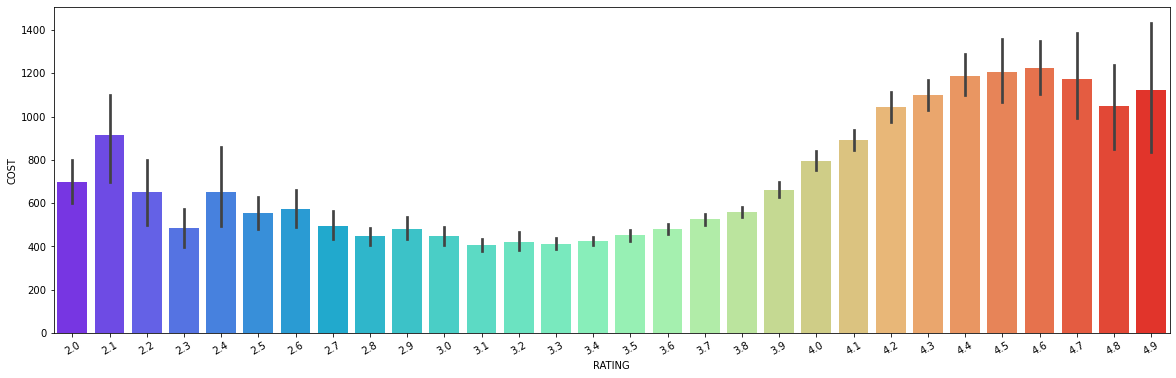

In [43]:
plt.figure(figsize=(20,6))
sn.barplot(x='RATING',y='COST',data=Train_data,palette='rainbow')
plt.xticks(rotation=30)
plt.show()

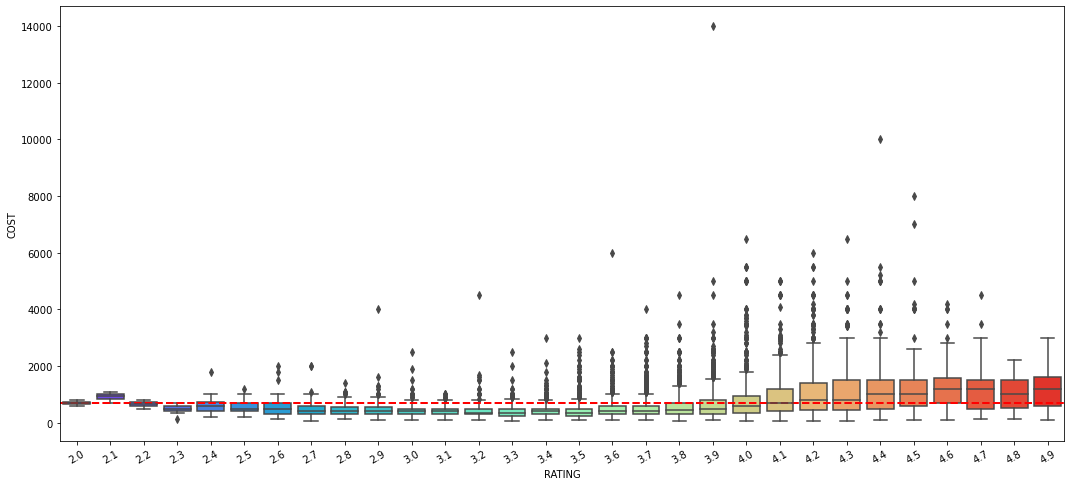

In [45]:
plt.figure(figsize=(18,8))
mean_price=np.mean(Train_data['COST'])
sn.boxplot(x='RATING',y='COST',data=Train_data,palette='rainbow')
plt.axhline(mean_price,color='r',linestyle='dashed',linewidth=2)
plt.xticks(rotation=30)
plt.show()

In [56]:
#Converting Title column

TITLE=Train_data['TITLE']
TITLE=pd.get_dummies(TITLE,drop_first=True)
TITLE.head()

,"BAKERY,BEVERAGE SHOP","BAKERY,CAF","BAKERY,CONFECTIONERY","BAKERY,DESSERT PARLOR","BAKERY,FOOD COURT","BAKERY,QUICK BITES","BAKERY,SWEET SHOP",BAR,"BAR,CAF","BAR,CASUAL DINING",...,"QUICK BITES,FOOD TRUCK","QUICK BITES,KIOSK","QUICK BITES,SWEET SHOP",SWEET SHOP,"SWEET SHOP,BAKERY","SWEET SHOP,BEVERAGE SHOP","SWEET SHOP,CASUAL DINING","SWEET SHOP,CONFECTIONERY","SWEET SHOP,DESSERT PARLOR","SWEET SHOP,QUICK BITES"
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
#Converting CITY column

CITY=Train_data['CITY']
CITY=pd.get_dummies(CITY,drop_first=True)
CITY.head()

,1st Stage,1st Tavarekere,3rd Street,5th Main Teachers Colony Koramangala Block 1 Bangalore 560034,6 & 7 - 4/64 Subhash Nagar,682036,Adjacent To Commercial Street,Aluva,Ambattur,Amrit kaur market opposite new delhi railway station paharganj,...,chennai,chullickal,hyderabad,khar west,kochi,navi mumbai,opp gurudwara Shakurpur,opp mukteshwar ashram powai,p.o Kochi,ward X11
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
#Converting LOCALITY column

LOCALITY=Train_data['LOCALITY']
LOCALITY=pd.get_dummies(LOCALITY,drop_first=True)
LOCALITY.head()

,1 st Cross street,1-7-172/1 Ecil Opposite,100 Ft Road,110009,11th Cross Road,14/90,14th Main Rd HSR,16,18th A Road,19th Main Road,...,kukatpally,madhapur,near Andhra Prabha office,near swarn nagri,nizampet,nungambakkam,perungudi,rajendra nagar,seawoods grand central mall,shop no. 3 Sector 22
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
#Converting VOTES column

VOTES=Train_data['VOTES']
VOTES=pd.get_dummies(VOTES,drop_first=True)
VOTES.head()

,100 votes,1000 votes,1001 votes,1002 votes,1004 votes,1005 votes,1007 votes,1008 votes,1009 votes,101 votes,...,989 votes,99 votes,990 votes,991 votes,992 votes,993 votes,996 votes,997 votes,998 votes,999 votes
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
#Converting CUISINES column

CUISINES=Train_data['CUISINES']
CUISINES=pd.get_dummies(CUISINES,drop_first=True)
CUISINES.head()

,American,"American, Arabian, Fast Food, Lebanese","American, Asian, Burger, Chinese, Desserts, Panini, Italian, Momos","American, Asian, Cafe, Continental, Italian, Burger, Pizza","American, Asian, Continental, North Indian, South Indian, Chinese","American, Asian, Street Food, Indian, Lucknowi, Mexican, Chinese,","American, BBQ","American, Beverages","American, Burger","American, Burger, Beverages",...,"Turkish, Arabian","Turkish, Arabian, Mughlai","Turkish, Desserts","Turkish, Fast Food, Beverages","Turkish, Rolls","Turkish, Rolls, Lebanese, Arabian",Vietnamese,"Vietnamese, Salad","Vietnamese, Thai, Burmese, Japanese","Wraps, Fast Food"
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
Train_data.drop(['TIME'],axis=1,inplace=True)

In [63]:
train=pd.concat([Train_data,TITLE,CUISINES,CITY,LOCALITY,VOTES],axis=1)

In [64]:
train.head()

,TITLE,RESTAURANT_ID,CUISINES,CITY,LOCALITY,RATING,VOTES,COST,"BAKERY,BEVERAGE SHOP","BAKERY,CAF",...,989 votes,99 votes,990 votes,991 votes,992 votes,993 votes,996 votes,997 votes,998 votes,999 votes
0,CASUAL DINING,9438,"Malwani, Goan, North Indian",Thane,Dombivali East,3.6,49 votes,1200,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",Chennai,Ramapuram,4.2,30 votes,1500,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi",Chennai,Saligramam,3.8,221 votes,800,0,0,...,0,0,0,0,0,0,0,0,0,0
3,QUICK BITES,6346,"Tibetan, Chinese",Mumbai,Bandra West,4.1,24 votes,800,0,0,...,0,0,0,0,0,0,0,0,0,0
4,DESSERT PARLOR,15387,Desserts,Mumbai,Lower Parel,3.8,165 votes,300,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
train.drop(['TITLE','CUISINES','CITY','LOCALITY','VOTES'],axis=1, inplace=True)
train.head()

,RESTAURANT_ID,RATING,COST,"BAKERY,BEVERAGE SHOP","BAKERY,CAF","BAKERY,CONFECTIONERY","BAKERY,DESSERT PARLOR","BAKERY,FOOD COURT","BAKERY,QUICK BITES","BAKERY,SWEET SHOP",...,989 votes,99 votes,990 votes,991 votes,992 votes,993 votes,996 votes,997 votes,998 votes,999 votes
0,9438,3.6,1200,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,13198,4.2,1500,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,10915,3.8,800,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,6346,4.1,800,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,15387,3.8,300,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
Train_data.shape

(11393, 8)

# TEST DATA

In [67]:
Test_data.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon ? 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am ? 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am ? 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am ? 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am ? 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes


In [68]:
Test_data.columns

Index(['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY',
       'RATING', 'VOTES'],
      dtype='object')

In [69]:
Test_data.dtypes

TITLE            object
RESTAURANT_ID     int64
CUISINES         object
TIME             object
CITY             object
LOCALITY         object
RATING           object
VOTES            object
dtype: object

In [70]:
Test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4231 entries, 0 to 4230
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          4231 non-null   object
 1   RESTAURANT_ID  4231 non-null   int64 
 2   CUISINES       4231 non-null   object
 3   TIME           4231 non-null   object
 4   CITY           4196 non-null   object
 5   LOCALITY       4201 non-null   object
 6   RATING         4229 non-null   object
 7   VOTES          3829 non-null   object
dtypes: int64(1), object(7)
memory usage: 264.6+ KB


In [71]:
Test_data.isnull().values.any()

True

In [72]:
Test_data.dropna(inplace=True)

In [73]:
Test_data.isnull().values.any()

False

In [77]:
from sklearn.preprocessing import LabelEncoder
for column in Train_data.columns:
    if Train_data[column].dtype==np.number:
        continue
    else:
        Train_data[column]=LabelEncoder().fit_transform(Train_data[column])

In [78]:
Test_data.describe()

,RESTAURANT_ID
count,3797.000000
mean,7822.147221
std,4468.346917
min,5.000000
25%,3923.000000
50%,7851.000000
75%,11691.000000
max,15572.000000


In [79]:
Test_data.shape

(3797, 8)

In [80]:
Train_data.head()

,TITLE,RESTAURANT_ID,CUISINES,CITY,LOCALITY,RATING,VOTES,COST
0,29,6443,2463,300,267,16,1277,34
1,31,9060,275,63,961,22,949,41
2,29,7484,2800,63,1015,18,711,26
3,93,4349,3893,206,128,21,786,26
4,48,10581,1663,206,573,18,469,12


In [81]:
Train_data.corr()

,TITLE,RESTAURANT_ID,CUISINES,CITY,LOCALITY,RATING,VOTES,COST
TITLE,1.000000,0.006075,0.240884,-0.019796,0.028073,-0.165625,0.002441,-0.349623
RESTAURANT_ID,0.006075,1.000000,0.057409,0.011293,-0.010292,0.034355,0.012920,0.045225
CUISINES,0.240884,0.057409,1.000000,0.030720,0.019686,-0.065187,-0.003174,-0.036680
CITY,-0.019796,0.011293,0.030720,1.000000,0.029376,0.055370,0.001871,0.061551
LOCALITY,0.028073,-0.010292,0.019686,0.029376,1.000000,-0.027435,0.003880,-0.011639
RATING,-0.165625,0.034355,-0.065187,0.055370,-0.027435,1.000000,-0.007886,0.355042
VOTES,0.002441,0.012920,-0.003174,0.001871,0.003880,-0.007886,1.000000,0.003463
COST,-0.349623,0.045225,-0.036680,0.061551,-0.011639,0.355042,0.003463,1.000000


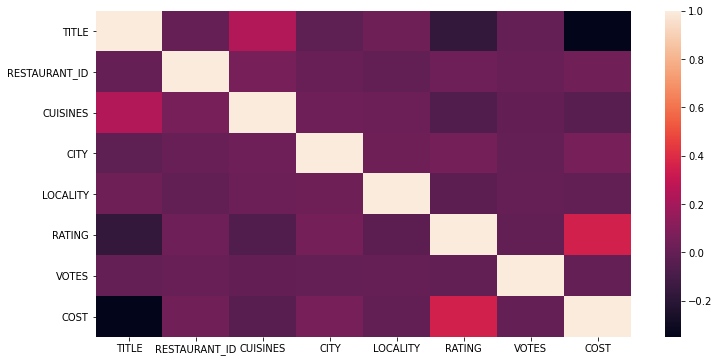

In [82]:
plt.figure(figsize=(12,6))
sn.heatmap(Train_data.corr())
plt.show()

Text(0.5, 1.0, 'Correlation with target Variable')

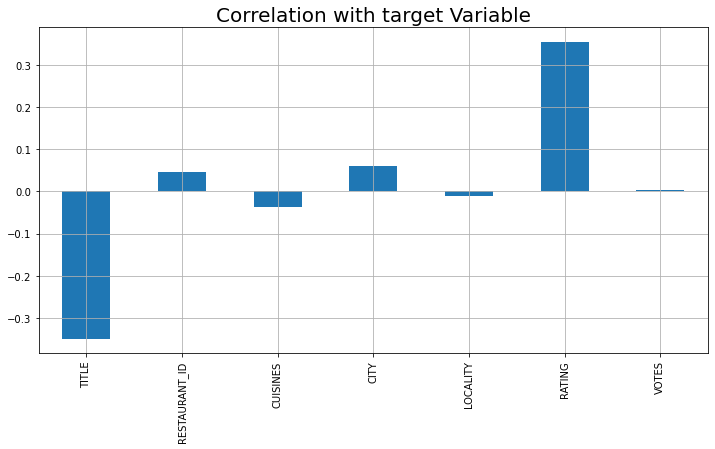

In [83]:
#Correlation with target column
plt.figure(figsize=(12,6))
Train_data.drop('COST',axis=1).corrwith(Train_data['COST']).plot(kind='bar',grid=True)
plt.xticks(rotation='vertical')
plt.title("Correlation with target Variable",fontsize=20)

In [84]:
from scipy.stats import zscore
z=np.abs(zscore(Train_data))
z

array([[0.86537594, 0.35507964, 0.31326892, ..., 0.43680224, 0.61407079,
        0.99837615],
       [0.80342471, 1.20278529, 1.61021315, ..., 0.98539007, 0.03934124,
        1.56121544],
       [0.86537594, 0.69228315, 0.60952736, ..., 0.03726186, 0.51346338,
        0.35513126],
       ...,
       [0.37364861, 0.74346293, 0.12628365, ..., 0.51132597, 0.91288727,
        1.23959299],
       [0.86537594, 0.36726793, 1.05347546, ..., 0.67383429, 0.05229581,
        0.36851925],
       [0.86537594, 0.304103  , 0.5831542 , ..., 0.91086635, 1.06627973,
        0.03350881]])

In [85]:
threshold=3
print(np.where(z>3))

(array([   81,   150,   195,   285,   313,   352,   388,   425,   455,
         512,   546,   610,   666,   756,   875,   876,   882,   911,
         920,  1026,  1079,  1215,  1260,  1330,  1333,  1439,  1473,
        1494,  1597,  1635,  1646,  1693,  1727,  1741,  1742,  1780,
        1869,  1896,  1906,  1979,  1995,  2112,  2118,  2127,  2145,
        2224,  2251,  2289,  2350,  2356,  2366,  2424,  2430,  2435,
        2477,  2511,  2640,  2657,  2682,  2686,  2712,  2743,  2755,
        2857,  2881,  2890,  2895,  2983,  3012,  3063,  3064,  3138,
        3146,  3147,  3176,  3178,  3182,  3201,  3248,  3324,  3326,
        3337,  3348,  3361,  3395,  3454,  3492,  3497,  3505,  3539,
        3550,  3559,  3630,  3723,  3728,  3796,  3841,  3847,  3852,
        3864,  3879,  3887,  3949,  3957,  3965,  4041,  4070,  4100,
        4104,  4109,  4196,  4229,  4241,  4259,  4412,  4436,  4507,
        4582,  4589,  4611,  4647,  4673,  4731,  4855,  4971,  5025,
        5027,  5113

In [86]:
Train_new=Train_data[(z<3).all(axis=1)]

In [87]:
#Checking the shape
print(Train_data.shape,'\t\t',Train_new.shape)

(11393, 8) 		 (11119, 8)


In [88]:
Train_data=Train_new
Train_data.shape

(11119, 8)

# FEATURE SELECTION

In [89]:
Train_data.shape

(11119, 8)

In [90]:
Train_data.columns

Index(['TITLE', 'RESTAURANT_ID', 'CUISINES', 'CITY', 'LOCALITY', 'RATING',
       'VOTES', 'COST'],
      dtype='object')

In [91]:
x=Train_data.drop(columns=['COST'],axis=1)
x.head()

,TITLE,RESTAURANT_ID,CUISINES,CITY,LOCALITY,RATING,VOTES
0,29,6443,2463,300,267,16,1277
1,31,9060,275,63,961,22,949
2,29,7484,2800,63,1015,18,711
3,93,4349,3893,206,128,21,786
4,48,10581,1663,206,573,18,469


In [92]:
y=Train_data['COST']
y.head()

0    34
1    41
2    26
3    26
4    12
Name: COST, dtype: int64

In [93]:
#Checking the shapeof input and target variable
print(x.shape,'\t\t',y.shape)


(11119, 7) 		 (11119,)


In [94]:
#Scaling in input variables
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

In [95]:
#Splitting the data into training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train, y_test=train_test_split(x,y,test_size=.20,random_state=42)


In [96]:
#Checking the shape
print(x_train.shape,'\t\t',x_test.shape)

(8895, 7) 		 (2224, 7)


In [97]:
#Checking the shape
print(y_train.shape,'\t',y_test.shape)

(8895,) 	 (2224,)


In [98]:
#import all the model library
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [99]:
#Importing Boosting models
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [100]:
#Importing error metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV,cross_val_score

In [101]:
model=[LinearRegression(),SVR(),DecisionTreeRegressor(),KNeighborsRegressor(),Lasso(),
      RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor()]
for m in model:
    m.fit(x_train,y_train)
    score=m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Score of',m,'is:',score)
    print("MAE",mean_absolute_error(y_test,predm))
    print("MSE",mean_squared_error(y_test,predm))
    print("RMSE",np.sqrt(mean_squared_error(y_test,predm)))
    print('R2_score:',r2_score(y_test,predm))
    print('********************************************')
    print('\n')
    

Score of LinearRegression() is: 0.25048581232100997
MAE 6.910212125841588
MSE 88.44429425465023
RMSE 9.404482668103027
R2_score: 0.24787113907864444
********************************************


Score of SVR() is: 0.3510498354652182
MAE 6.330015536311938
MSE 79.50090614952663
RMSE 8.916328064260906
R2_score: 0.3239255681966714
********************************************


Score of DecisionTreeRegressor() is: 1.0
MAE 6.371852517985611
MSE 75.87904676258992
RMSE 8.710857980852973
R2_score: 0.35472580237877405
********************************************


Score of KNeighborsRegressor() is: 0.5488758075886665
MAE 6.620953237410072
MSE 83.18044964028778
RMSE 9.12033166284471
R2_score: 0.292634789320099
********************************************


Score of Lasso() is: 0.23130538821530267
MAE 6.911577062602257
MSE 90.36102035311694
RMSE 9.505841380599454
R2_score: 0.2315713310549946
********************************************


Score of RandomForestRegressor() is: 0.9587789576276265
MAE

In [102]:
#Cross validate all algorithm by using for loop

model=[LinearRegression(),SVR(),DecisionTreeRegressor(),KNeighborsRegressor(),Lasso(),
      RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor()]
for m in model:
    score=cross_val_score(m,x,y,cv=10,scoring='r2')
    print("Model:",m)
    print("Score",score)
    print('Mean Score:',score.mean())
    print("Standard deviation:",score.std())
    print("******************************")
    print('\n')

Model: LinearRegression()
Score [0.24665243 0.25259651 0.23575098 0.26114382 0.22655539 0.26539612
 0.23965425 0.22811492 0.25117088 0.27034195]
Mean Score: 0.247737725372342
Standard deviation: 0.014428571039046755
******************************


Model: SVR()
Score [0.34032477 0.3472375  0.33910951 0.31354448 0.31162403 0.34494203
 0.31417956 0.31471048 0.34415493 0.34584452]
Mean Score: 0.33156718070939617
Standard deviation: 0.014930996015690135
******************************


Model: DecisionTreeRegressor()
Score [0.4258972  0.3792109  0.40912107 0.39843211 0.41033573 0.42323136
 0.44839653 0.39367951 0.41468599 0.47544499]
Mean Score: 0.4178435380226283
Standard deviation: 0.026345598548570014
******************************


Model: KNeighborsRegressor()
Score [0.31120074 0.30359968 0.26241773 0.27896242 0.28621949 0.35922973
 0.32583555 0.26819083 0.3419395  0.34617979]
Mean Score: 0.30837754557547326
Standard deviation: 0.03249683891549618
******************************


Model

In [103]:
from sklearn.model_selection import GridSearchCV
parameters={'n_estimators':[400,500,600,700],'max_depth':[4,5,6,15,20]}
RFC=RandomForestRegressor()
clf=GridSearchCV(RFC,parameters)
clf.fit(x,y)
print(clf.best_params_)

{'max_depth': 20, 'n_estimators': 400}


In [105]:
#Using Random Forest Regressor with its parameters
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=400,min_samples_split=15,min_samples_leaf=1,max_features='auto',max_depth=20)
rf.fit(x_train,y_train)
print('Score:',rf.score(x_train,y_train))
y_pred=rf.predict(x_test)
print('\n')
print("MAE",mean_absolute_error(y_test,y_pred))
print("MSE",mean_squared_error(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2_score:',r2_score(y_test,y_pred))
print('********************************************')
print('\n')

Score: 0.8615598527543136


MAE 4.6517483316389425
MSE 38.31986886863117
RMSE 6.1903044245522505
R2_score: 0.674128449260548
********************************************




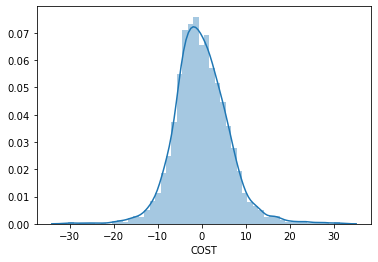

In [106]:
sn.distplot(y_test-y_pred)
plt.show()

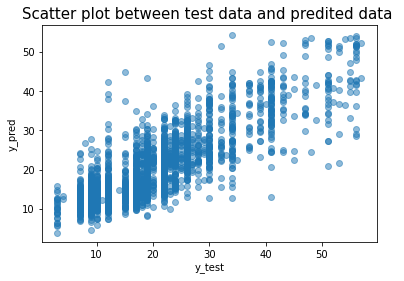

In [107]:
plt.scatter(y_test,y_pred,alpha=0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.title("Scatter plot between test data and predited data ",fontsize=15)
plt.show()